This notebook containt an implementation of de Casteljau's algorithm  along with visualization of Bezier curves.
The implemtation of de Casteljau's algorithm is provided within evaluate's method.
Animation is implemented in plot_t's method

In [41]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
from ipywidgets import interactive
from matplotlib import colors as mcolors
%matplotlib inline
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [53]:
t=np.linspace(0,1,4)

In [54]:
t

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [166]:
class Bezier:
    def __init__(self, points,keep_history=True):
        self.n = points.shape[1]
        self.points = points
        self.t = np.linspace(0,1,100)
        
        if keep_history:
            self.curve_evolution = np.array([ self.evaluate(i)[0] for i in self.t]).T[0]
        
        
    def evaluate(self,t):
        new_p  = self.points 
        weights = np.array([[t,1-t]]) 
        results = [new_p]
        for i in range(self.n-1):
            new_p = convolve(new_p,weights,mode='valid') 
            results.append(new_p)
            
        return new_p,results[:-1]

    def plot_init(self):

        self.fig = plt.figure()
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))

    def plot_t(self,t0,plot_until_t0,title=''):
        t_pos=int(np.ceil(t0/self.t[1]))
        Bez_cur= self.curve_evolution[:,:t_pos]
        pol = self.evaluate(t0)[1] 
        for i,convex_pol in enumerate(pol):
            c=colors[i]
            for edge in range(convex_pol.shape[1]-1):
                plt.plot(convex_pol[0][edge:edge+2],convex_pol[1][edge:edge+2],c)
        if plot_until_t0:
            plt.plot(Bez_cur[0],Bez_cur[1])
        else:
            plt.scatter([Bez_cur[0][-1]],[Bez_cur[1][-1]])
        plt.title(title)
        plt.show()

    def update(self,t0):
        self.ax.clear()
         
        t_pos=int(np.ceil(t0/self.t[1]))
        Bez_cur= self.curve_evolution[:,:t_pos]
        pol = self.evaluate(t0)[1] 
        for i,convex_pol in enumerate(pol):
            c=colors[i]
            for edge in range(convex_pol.shape[1]-1):
                self.ax.plot(convex_pol[0][edge:edge+2],convex_pol[1][edge:edge+2],c)
        
        self.ax.plot(Bez_cur[0],Bez_cur[1])
            
        return self.ax

    def interactive_plot(self):
        plot_f = lambda t0: self.plot_t(t0=t0,plot_until_t0=True)
        interactive_plot = interactive(plot_f,t0=(0,1,0.01))
        output = interactive_plot.children[-1]
        output.layout.height = '350px'
        return interactive_plot
    
                

In [167]:
#control_points = np.random.rand(2,4)
control_points = np.array([[1,2,3],[1,3,0]])
curve = Bezier(control_points)

In [150]:
plot = curve.interactive_plot()
plot

interactive(children=(FloatSlider(value=0.0, description='t0', max=1.0, step=0.01), Output(layout=Layout(heigh…

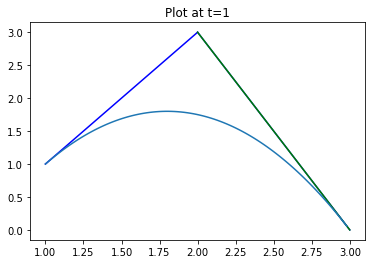

In [151]:
t=1
curve.plot_t(t,True,'Plot at t='+str(t))

In [170]:
control_points = np.random.rand(2,8)
curve = Bezier(control_points)
plot = curve.interactive_plot()
plot

interactive(children=(FloatSlider(value=0.0, description='t0', max=1.0, step=0.01), Output(layout=Layout(heigh…

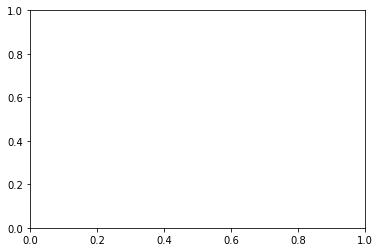

In [153]:
curve.plot_init()

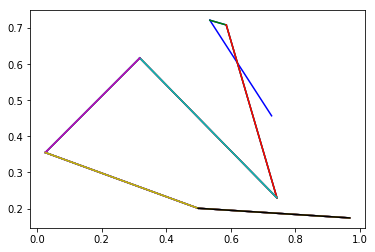

In [171]:
from matplotlib.animation import FuncAnimation

curve.plot_init()

anim = FuncAnimation(curve.fig, curve.update, 
                               frames=curve.t, blit=False, repeat=True)


In [172]:
anim.save('./random.gif', writer='imagemagick')